In [ ]:
import numpy as np
from tensorflow import keras
print (keras.__version__)


2.8.0


In [ ]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [ ]:
X_train_final = X_train.reshape(-1,3072)
X_train_final.shape

(50000, 3072)

In [ ]:
X_test_final = X_test.reshape(-1,3072)
X_test_final.shape

(10000, 3072)

In [ ]:
X_train_final = X_train_final / 255
X_test_final = X_test_final / 255

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(10, input_shape= (3072,), activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
results = model.fit(
    x = X_train_final,
    y = y_train,
    shuffle = True,
    epochs = 30,
    batch_size = 16,
    validation_data = (X_test_final, y_test)
)

Epoch 1/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.9889 - accuracy: 0.2966 - val_loss: 1.9096 - val_accuracy: 0.3287
Epoch 2/30
3125/3125 [==============================] - 7s 2ms/step - loss: 1.8907 - accuracy: 0.3408 - val_loss: 1.8704 - val_accuracy: 0.3407
Epoch 3/30
3125/3125 [==============================] - 7s 2ms/step - loss: 1.8627 - accuracy: 0.3531 - val_loss: 1.8379 - val_accuracy: 0.3520
Epoch 4/30
3125/3125 [==============================] - 7s 2ms/step - loss: 1.8404 - accuracy: 0.3608 - val_loss: 1.9013 - val_accuracy: 0.3355
Epoch 5/30
3125/3125 [==============================] - 7s 2ms/step - loss: 1.8321 - accuracy: 0.3670 - val_loss: 1.8090 - val_accuracy: 0.3809
Epoch 6/30
3125/3125 [==============================] - 7s 2ms/step - loss: 1.8207 - accuracy: 0.3717 - val_loss: 1.9288 - val_accuracy: 0.3313
Epoch 7/30
3125/3125 [==============================] - 7s 2ms/step - loss: 1.8175 - accuracy: 0.3750 - val_loss: 1.8530 - val_accuracy

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Losses')

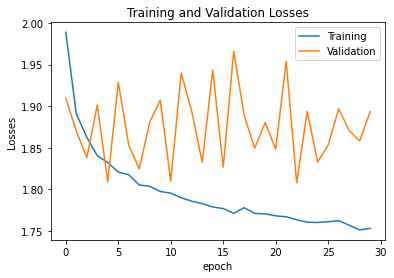

In [ ]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch')
plt.ylabel('Losses')


Text(0, 0.5, 'accuarcy')

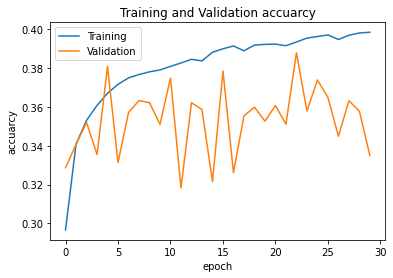

In [ ]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuarcy')
plt.xlabel('epoch')
plt.ylabel('accuarcy')
